<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/Fundamentals_of_Statistics_and_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [2]:
def coin_toss(tosses=100):
  return pd.Series(np.random.choice(['Heads','Tails'],tosses))
def die_roll(rolls=600):
  return pd.Series(np.random.randint(1,7,rolls))

In [3]:
output=coin_toss()
print(output.value_counts())
fig = pg.Figure([pg.Bar(x=output.value_counts().keys(), 
                        y=output.value_counts().values)])
fig.show()

Heads    51
Tails    49
dtype: int64


In [4]:
output = pd.Series([np.sum(coin_toss(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=output.value_counts().keys(), 
                        y=output.value_counts().values)])
fig.show()

In [5]:
output = pd.Series([np.sum(coin_toss(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=output.value_counts().keys(), 
                        y=output.value_counts().values)])
fig.show()

In [6]:
results = {shots: die_roll(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(), 
                        y=results.value_counts().values / shots,) 
                    for shots, results in results.items()])
fig.add_shape(type='line', x0=0.0, y0=1/6, x1=7.0, y1=1/6, line=dict(color='Red'))
fig.show()

In [7]:
#question answers
#1.[4*(10-2+1)]/[4*13]=9/13
#2.[9/13]*[9/13]=81/169
#3.[9/13]*[{4*(10-2+1)-1}/{52-1}]=[9/13]*[35/51]=[3/13]*[35/17]=105/221

In [8]:
thrown_cards=[]
def thrown_out():
  thrown_cards=[]
  types=['H','D','C','S']
  types_in_each=['A','2','3','4','5','6','7','8','9','10','J','Q','K']
  p=q=0
  t=1
  while(t==1):
    p=np.random.randint(0,4)
    q=np.random.randint(0,13)
    r=types[p]+types_in_each[q]
    s=0
    for i in thrown_cards:
      if(i==r):
        s+=1
    if(s==0):
      thrown_cards.append(r)

    if(thrown_cards[-1][1]!='A'):
      t=1
    else:
      t=0  
  print('number of thrown out cards:',len(thrown_cards)-1,'\nthrown out cards:',thrown_cards)  
  return (len(thrown_cards)-1)
a=0  
num=20
for _ in range(num):
  a+=thrown_out()
a=a/num
print('An average of ',a,' cards are thrown out before an Ace')  

number of thrown out cards: 15 
thrown out cards: ['D6', 'H6', 'SK', 'H5', 'C4', 'H9', 'D5', 'C7', 'SJ', 'S4', 'H2', 'H8', 'DK', 'D8', 'HJ', 'CA']
number of thrown out cards: 25 
thrown out cards: ['S6', 'C10', 'DQ', 'C7', 'DJ', 'S9', 'SK', 'S4', 'CK', 'HK', 'DK', 'S10', 'S2', 'C3', 'S5', 'S3', 'D9', 'H6', 'H7', 'C4', 'H4', 'D8', 'C5', 'CJ', 'C8', 'HA']
number of thrown out cards: 1 
thrown out cards: ['D6', 'CA']
number of thrown out cards: 4 
thrown out cards: ['SK', 'S9', 'CK', 'C10', 'CA']
number of thrown out cards: 0 
thrown out cards: ['CA']
number of thrown out cards: 16 
thrown out cards: ['HK', 'DQ', 'D5', 'H6', 'D2', 'S4', 'C5', 'C10', 'SQ', 'SK', 'C6', 'H8', 'D8', 'H3', 'SJ', 'S2', 'DA']
number of thrown out cards: 16 
thrown out cards: ['C6', 'H9', 'S7', 'H6', 'H7', 'S9', 'H3', 'H4', 'D3', 'C3', 'D4', 'D8', 'HJ', 'CK', 'S10', 'CJ', 'CA']
number of thrown out cards: 9 
thrown out cards: ['SK', 'S6', 'D6', 'D2', 'HJ', 'CK', 'D5', 'HQ', 'DJ', 'SA']
number of thrown out cards:

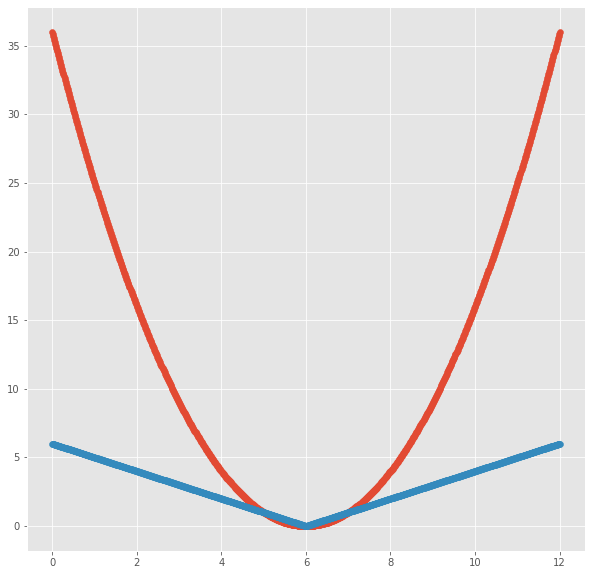

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error') #we know the mean is 6,since we used linspace
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [10]:
#stats
grades=pd.read_csv('https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv')
print(grades)
grades.describe()

         Name  Physics  Biology  Maths
0      Arnold       80       78     70
1         Bob       60       98     45
2   Cassandra       34       56     65
3     Donovan       56       65     32
4       Emily       98       23     55
5      Fabian       45       44     60
6        Grom       12       66     80
7      Hilary       60       88     78
8        Ivan       45       97     99
9        John       98       80     84
10      Kevin       78       78     65
11      Loius       56       66     66
12      Mandy       95       56     87
13    Natalie       75       78     60
14     Oliver       80       98     89
15    Patrick       69       56     85
16     Quiton       45       56     80
17     Robert       78       66     70
18      Sofia       88       98     50
19      Terry       77       77     60
20      Usman       40       64     88
21    Vanessa       50       48     98
22     Wilson       66       75     67
23     Xavier       89       75     40
24       Yuki       60   

,Physics,Biology,Maths
count,26.000000,26.000000,26.000000
mean,63.769231,67.038462,69.769231
std,22.742573,21.371908,17.339683
min,12.000000,20.000000,32.000000
25%,46.250000,56.000000,60.000000
50%,63.000000,66.000000,68.500000
75%,79.500000,78.000000,83.500000
max,98.000000,98.000000,99.000000


In [11]:
grades.shape

(26, 4)

In [12]:
grades.agg(["mean","var","std"])

,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


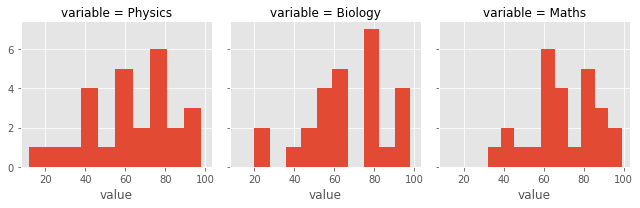

In [13]:
fig=sns.FacetGrid(grades.melt("Name"),col='variable')
fig.map(plt.hist,"value")

In [14]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [15]:
#binomial distrbution
from scipy.stats import binom

In [16]:
binom.pmf(k=5,n=5,p=0.25) #pmf-probability mass function

0.0009765625

In [17]:
0.25**5

0.0009765625

In [18]:
#P(X<=3) = Cummulative distribution funtion(3) = P(X=0)+P(X=1)+P(X=2)+P(X=3) = 1-P(X=4)-P(X=5)
1-binom.pmf(k=4,n=5,p=0.75)-binom.pmf(k=5,n=5,p=0.75)

0.36718749999999994

In [19]:
binom.cdf(3,n=5,p=0.75)

0.3671875

In [20]:
#normal distribution
from scipy.stats import norm

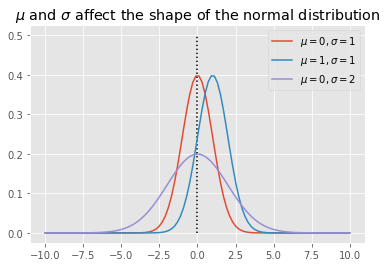

In [21]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [22]:
norm.cdf(0) #sinc symmetric about mean and total area under graph is 1,this hsould be 0.5

0.5

In [23]:
norm.ppf(0.5) #it is like the inverse of cdf 

0.0

In [24]:
# 68% of data lies within 1 standard deviation of mean = P(X<=(u+d))-P(X>=(u-d))
# 95% of data lies within 2 standard deviation of mean
# 99.7% of data lies within 3 standard deviation of mean

In [25]:
#example
norm.ppf(0.84,loc=169.57,scale=7.57) # 84% of males have less height than this 

177.09804617589782

In [26]:
norm.ppf(0.975,loc=169.57,scale=7.57) 

184.4069273629682

In [27]:
norm.ppf(0.0015,loc=169.57,scale=7.57)

147.10422390516268